In [ ]:
# Install Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rDu07a3J7xVFKsSa5HLB")  # replace with your Roboflow API key
project = rf.workspace("fyp-ormnr").project("supermarket-empty-shelf-detector")
dataset = project.version(1).download("yolov5")  # or change to 'coco' format


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Supermarket-Empty-Shelf-Detector--1 in yolov5pytorch:: 100%|██████████| 1006/1006 [00:00<00:00, 3660.45it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17485 (delta 79), reused 30 (delta 30), pack-reused 17378 (from 3)
Receiving objects: 100% (17485/17485), 16.35 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s

In [ ]:
%%writefile /content/Supermarket-Empty-Shelf-Detector--1/data.yaml
train: /content/Supermarket-Empty-Shelf-Detector--1/train/images
val: /content/Supermarket-Empty-Shelf-Detector--1/valid/images
test: /content/Supermarket-Empty-Shelf-Detector--1/test/images

nc: 1
names: ['100- O-O-S']
roboflow:
  license: CC BY 4.0
  project: supermarket-empty-shelf-detector
  url: https://universe.roboflow.com/fyp-ormnr/supermarket-empty-shelf-detector/dataset/1
  version: 1
  workspace: fyp-ormnr


Overwriting /content/Supermarket-Empty-Shelf-Detector--1/data.yaml


In [ ]:
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 10 --data /content/Supermarket-Empty-Shelf-Detector--1/data.yaml --weights yolov5n.pt --name fast_run


[Errno 2] No such file or directory: '/content/yolov5'
/content
python3: can't open file '/content/train.py': [Errno 2] No such file or directory


In [ ]:
!python detect.py --weights runs/train/fast_run/weights/best.pt --img 416 --source /content/Supermarket-Empty-Shelf-Detector--1/valid/images --conf 0.25 --name shelf_test


detect: weights=['runs/train/fast_run/weights/best.pt'], source=/content/Supermarket-Empty-Shelf-Detector--1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=shelf_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/95 /content/Supermarket-Empty-Shelf-Detector--1/valid/images/test2020_1027_jpg.rf.d7dca10906229b5b25538808dede6056.jpg: 416x416 7 100- O-O-Ss, 69.3ms
image 2/95 /content/Supermarket-Empty-Shelf-Detector--1/valid/images/test2020_1036_jpg.rf.64fa7e4373e595df4ac3d1c7272fdffd.jpg: 416

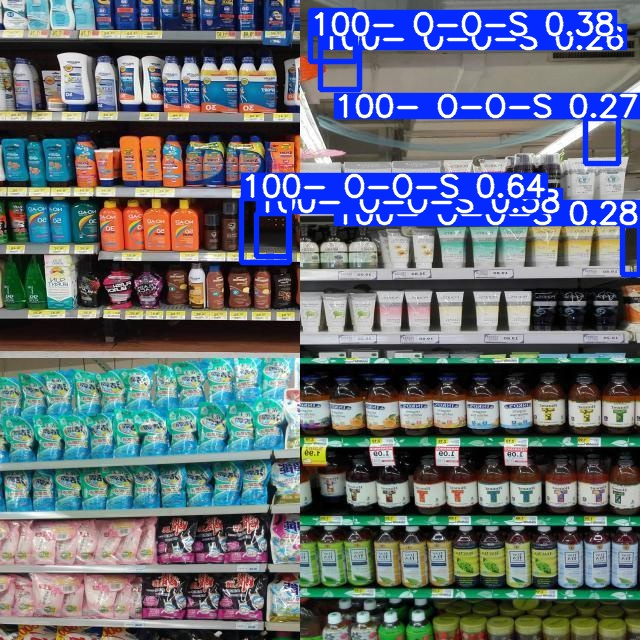

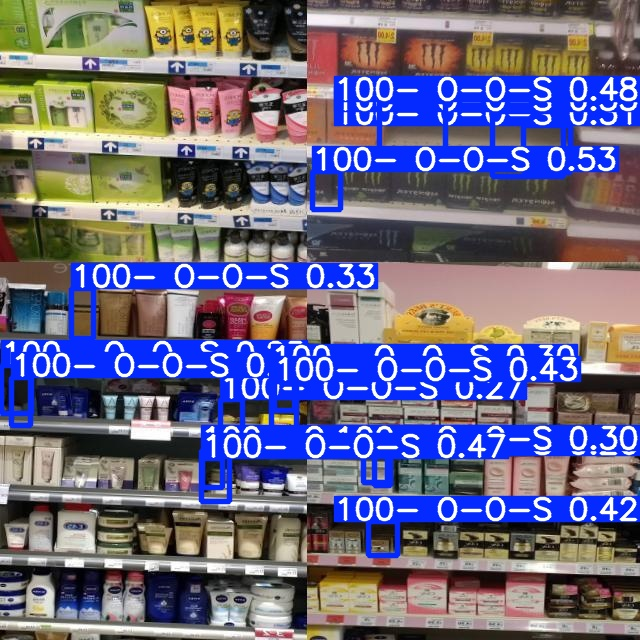

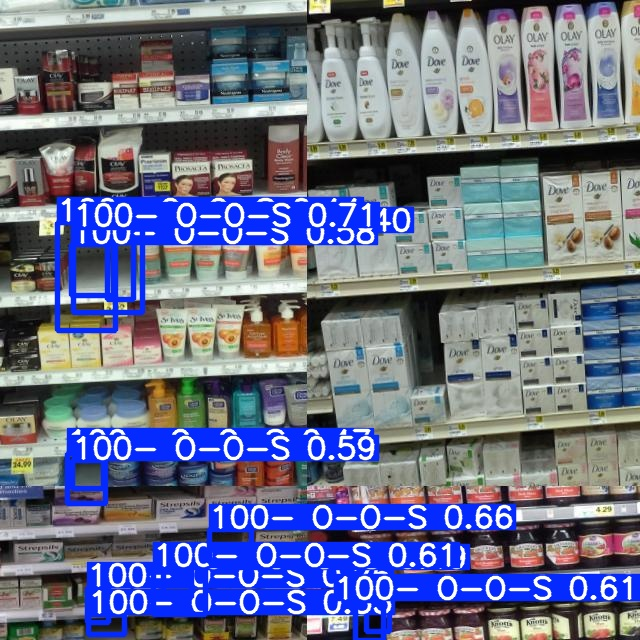

In [ ]:
import os
from IPython.display import Image, display

# List and display first 3 detected images
output_dir = '/content/yolov5/runs/detect/shelf_test'
images = os.listdir(output_dir)

for img_file in images[:3]:  # Show first 3
    display(Image(filename=os.path.join(output_dir, img_file)))


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving my_store.jpg to my_store (3).jpg


In [ ]:
import os

# Search for the image in the '/content' directory
image_name = "my_store.jpg"  # or the actual name you uploaded

# Search for the file in '/content' and its subdirectories
for root, dirs, files in os.walk("/content"):
    if image_name in files:
        print(f"Found image at: {os.path.join(root, image_name)}")
        break


Found image at: /content/yolov5/my_store.jpg


In [ ]:
%cd /content/yolov5
!python detect.py --weights runs/train/fast_run/weights/best.pt --img 416 --source /content/yolov5/my_store.jpg --conf 0.25 --name uploaded_test


/content/yolov5
detect: weights=['runs/train/fast_run/weights/best.pt'], source=/content/yolov5/my_store.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=uploaded_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /content/yolov5/my_store.jpg: 352x416 35 100- O-O-Ss, 72.6ms
Speed: 1.2ms pre-process, 72.6ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/uploaded_test3


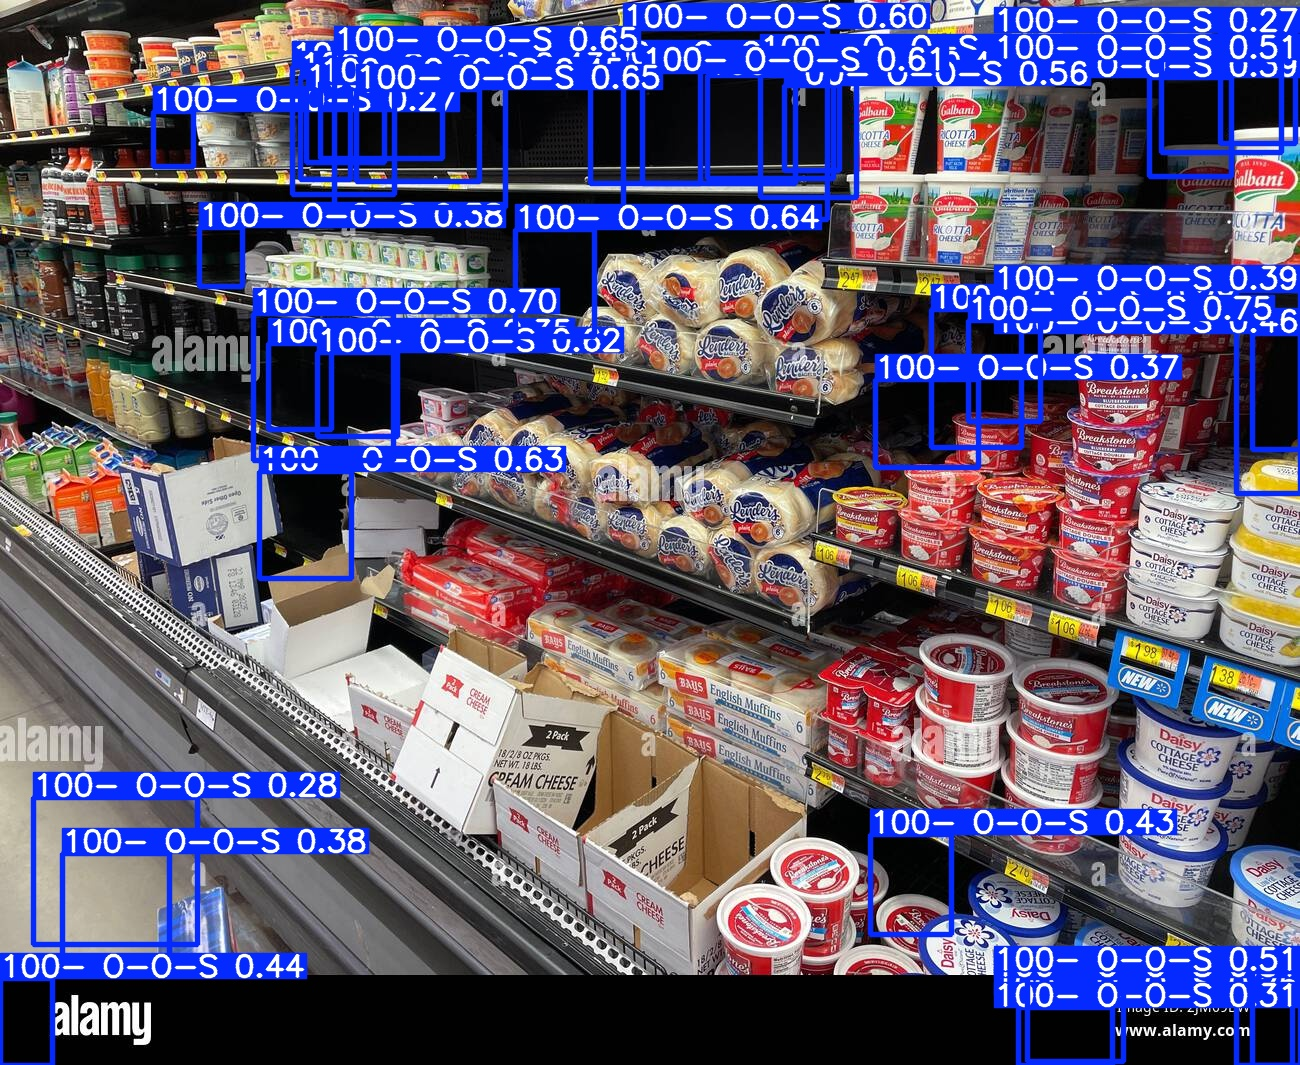

In [ ]:
from PIL import Image
import IPython.display as display

# Load the result image
img_path = '/content/yolov5/runs/detect/uploaded_test3/my_store.jpg'

# Open the image
img = Image.open(img_path)

# Display the image
display.display(img)
